In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/aneruthmohanasundaram/Desktop/KNN/dia.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Create a Standard Scalar 
lm = StandardScaler()

In [4]:
# Considering only the feature class 
lm.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [5]:
# Converting the scalar class into feature variable 
lm_feature = lm.transform(df.drop('Outcome',axis=1))

# To check the scaled Values 
print(lm_feature)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [6]:
# using the scaled feature classs to create a dataframe 
df_feat = pd.DataFrame(lm_feature,columns=df.columns[:-1])

df_feat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [7]:
# To split the data into two methods
# Test data set and Train data set 

X = df_feat
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
# Initialise the KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
# To predict the modeled data
pre = knn.predict(X_test)

# Printng the predicted model 
print(pre)

[1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0]


In [11]:
# To Print the confusion matrix 
print('Confusion Matrix:' + '\n''\n',confusion_matrix(y_test,pre) )

# To give a line gap
print('\n')

# To print clasification report 
print('Classification Report')
print('\n')
print(classification_report(y_test,pre))

Confusion Matrix:

 [[123  27]
 [ 40  41]]


Classification Report


              precision    recall  f1-score   support

           0       0.75      0.82      0.79       150
           1       0.60      0.51      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Age VS BMI')

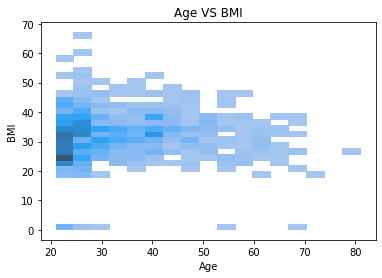

In [38]:
# To visualise the data 

# Data VZisualisation for the age vs BMI
sns.histplot(df,x='Age',y='BMI')
plt.title('Age VS BMI')


Text(0.5, 1.0, 'Age VS Blood Pressure')

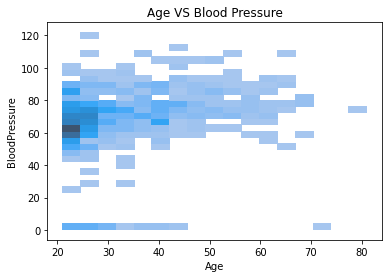

In [47]:
# Data Visualisation for Age vs Blood Pressure 
sns.histplot(df,x='Age',y='BloodPressure')
plt.title('Age VS Blood Pressure')

Text(0, 0.5, 'Outcome')

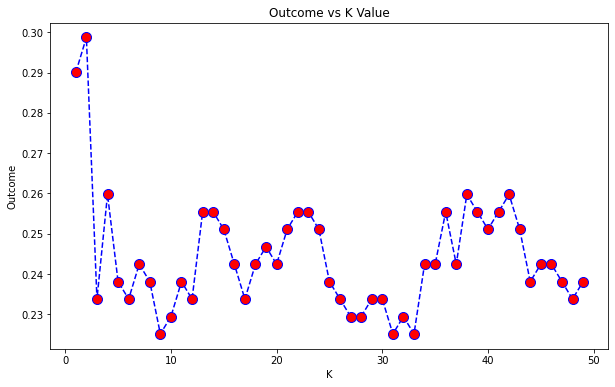

In [52]:
# Using elbow method to choose the correct K value.
rate = []

for i in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    predict = knn1.predict(X_test)
    rate.append(np.mean(predict != y_test)) # to check the prediction with the test data

# TO visualise the prediction
plt.figure(figsize=(10,6))
plt.plot(range(1,50),rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10) # to print the predictions for range of 1 to 40.
plt.title('Outcome vs K Value')
plt.xlabel('K')
plt.ylabel('Outcome')

In [56]:
# After seeing the above chart choose the higher K value
knn2 = KNeighborsClassifier(n_neighbors=32)
knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

# To print the confusion matrix 
print('Confusion Matrix:' + '\n''\n',confusion_matrix(y_test,pred) )
# print('\n')
# print(confusion_matrix(y_test,pre))

print('\n')

# To print clasification report 
print('Classification Report')
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix:

 [[138  12]
 [ 41  40]]


Classification Report


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       150
           1       0.77      0.49      0.60        81

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231



In [57]:
# Confusion matrix can also be obtained using crosstab method of pandas
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,138,12,150
1,41,40,81
All,179,52,231
